Dataset Loaded:
    Product_ID     Category  Price  Quantity_Sold  Ratings
0         101     Clothing    441            257      4.4
1         102     Clothing    543            124      4.3
2         103  Electronics    593            205      4.6
3         104  Electronics    385            297      4.8
4         105         Home    336            185      3.4

Basic Statistics:
         Product_ID        Price  Quantity_Sold      Ratings
count  2000.000000  2000.000000    2000.000000  2000.000000
mean   1100.500000   310.511000     173.993000     4.023950
std     577.494589   169.307703      72.225059     0.570547
min     101.000000    20.000000      50.000000     3.000000
25%     600.750000   163.000000     112.000000     3.600000
50%    1100.500000   311.000000     173.000000     4.050000
75%    1600.250000   462.250000     237.000000     4.500000
max    2100.000000   599.000000     299.000000     5.000000

Missing Values:
 Product_ID       0
Category         0
Price            0


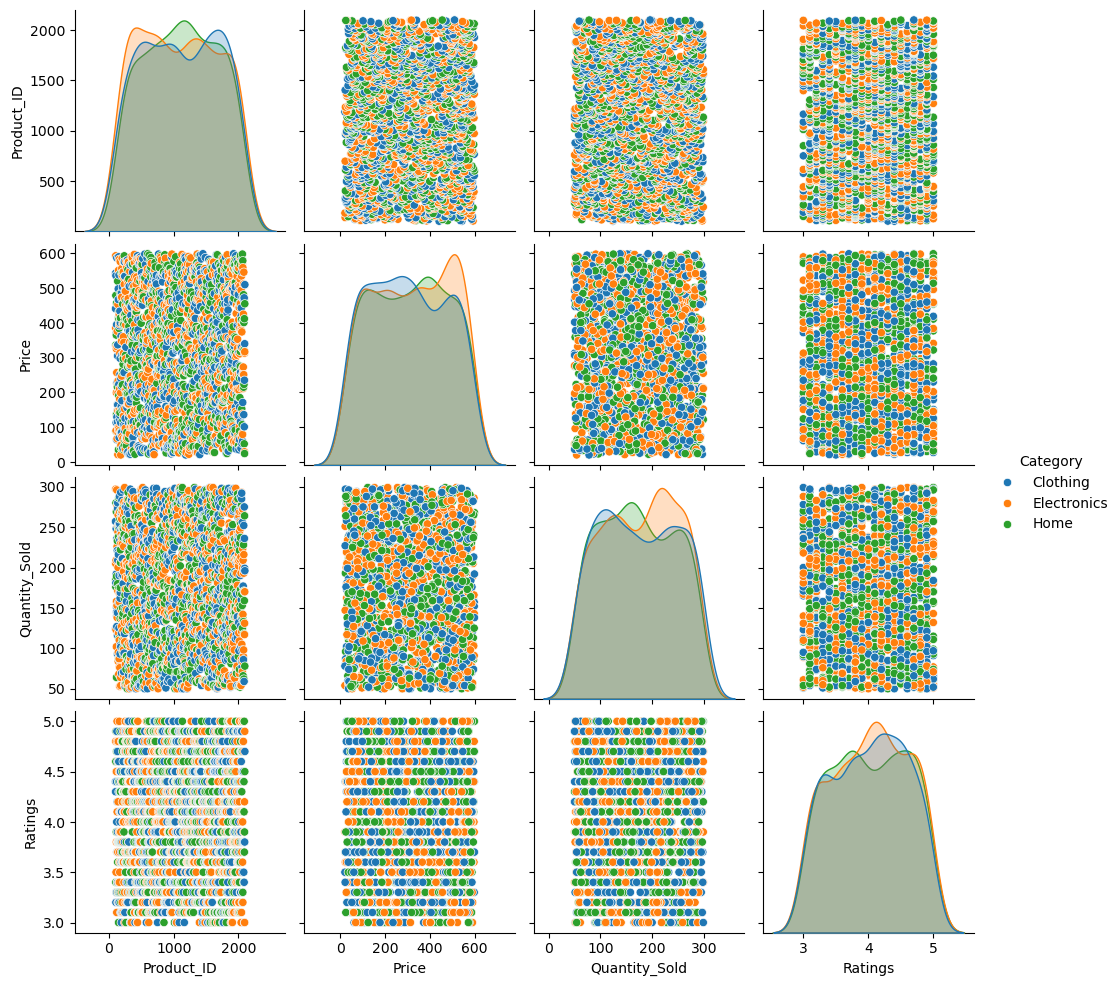

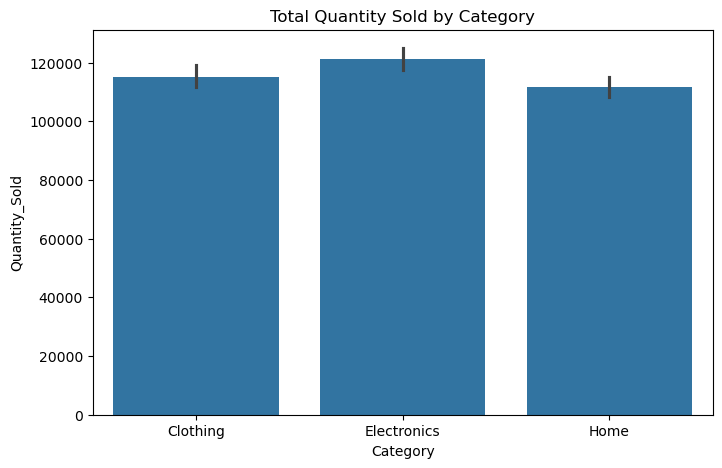


Highest Sales Product:
 Product_ID               242
Category         Electronics
Price                    152
Quantity_Sold            299
Ratings                  4.7
Name: 141, dtype: object

Highest Rated Product:
 Product_ID               125
Category         Electronics
Price                     67
Quantity_Sold            226
Ratings                  5.0
Name: 24, dtype: object


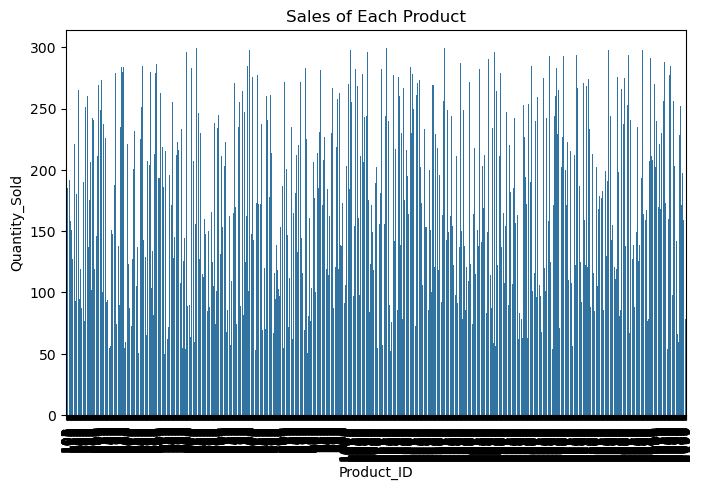

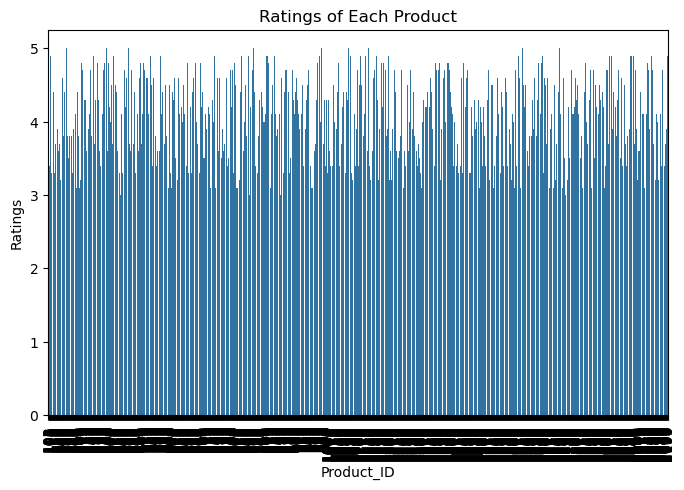


Most Demanding Product Category:
 Category         Electronics
Quantity_Sold         121230
Name: 1, dtype: object


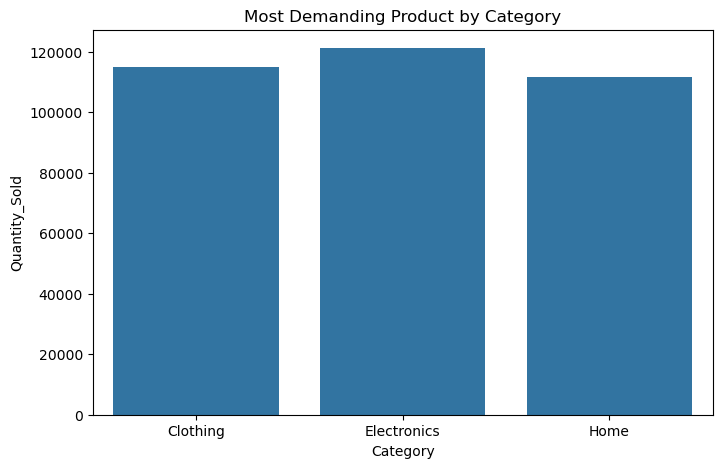

MAE: 60.83746418063321
MSE: 5040.22202632952
R2 Score: 0.0020825804577015994


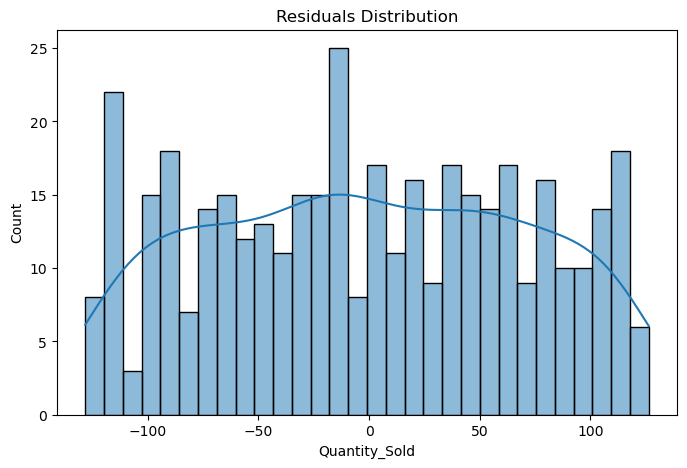

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Load dataset
df = pd.read_csv("ecomm_data_2000.csv")
print("Dataset Loaded:\n", df.head())

# Data Analysis
def data_summary(df):
    print("\nBasic Statistics:\n", df.describe())
    print("\nMissing Values:\n", df.isnull().sum())
    print("\nCategory Distribution:\n", df["Category"].value_counts())

data_summary(df)

# Data Visualization
def visualize_data(df):
    sns.pairplot(df, hue="Category")
    plt.show()
    
    plt.figure(figsize=(8,5))
    sns.barplot(x=df["Category"], y=df["Quantity_Sold"], estimator=sum)
    plt.title("Total Quantity Sold by Category")
    plt.show()

visualize_data(df)

# Highest Sales and Most Rated Product
def highest_sales_and_ratings(df):
    highest_sales = df.loc[df["Quantity_Sold"].idxmax()]
    highest_rated = df.loc[df["Ratings"].idxmax()]
    print("\nHighest Sales Product:\n", highest_sales)
    print("\nHighest Rated Product:\n", highest_rated)
    
    plt.figure(figsize=(8,5))
    sns.barplot(x=df["Product_ID"], y=df["Quantity_Sold"])
    plt.xticks(rotation=90)
    plt.title("Sales of Each Product")
    plt.show()
    
    plt.figure(figsize=(8,5))
    sns.barplot(x=df["Product_ID"], y=df["Ratings"])
    plt.xticks(rotation=90)
    plt.title("Ratings of Each Product")
    plt.show()

highest_sales_and_ratings(df)

# Most Demanding Product
def most_demanding_product(df):
    demand_per_category = df.groupby("Category")["Quantity_Sold"].sum().reset_index()
    most_demanded = demand_per_category.loc[demand_per_category["Quantity_Sold"].idxmax()]
    print("\nMost Demanding Product Category:\n", most_demanded)
    
    plt.figure(figsize=(8,5))
    sns.barplot(x=demand_per_category["Category"], y=demand_per_category["Quantity_Sold"])
    plt.title("Most Demanding Product by Category")
    plt.show()

most_demanding_product(df)

# Preparing Data for Machine Learning
def prepare_data(df):
    df_numeric = df.drop(columns=["Product_ID", "Category"], errors='ignore')
    X = df_numeric.drop(columns=["Quantity_Sold"], errors='ignore')
    y = df_numeric["Quantity_Sold"]
    return train_test_split(X, y, test_size=0.2, random_state=42)

X_train, X_test, y_train, y_test = prepare_data(df)

# Model Training
def train_model(X_train, y_train):
    model = LinearRegression()
    model.fit(X_train, y_train)
    return model

model = train_model(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Evaluation
def evaluate_model(y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"MAE: {mae}")
    print(f"MSE: {mse}")
    print(f"R2 Score: {r2}")

evaluate_model(y_test, y_pred)

# Residual Plot
def residual_plot(y_test, y_pred):
    residuals = y_test - y_pred
    plt.figure(figsize=(8,5))
    sns.histplot(residuals, bins=30, kde=True)
    plt.title("Residuals Distribution")
    plt.show()

residual_plot(y_test, y_pred)
